In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from pandas import DataFrame
%matplotlib inline

In [3]:
dataframe = pd.read_csv("InformacionEmpleados.csv")

In [4]:
dataframe.head()

,id,genero,nivel_cargo,edad,antiguedad_anos,vicepresidencia,rango_salarial,nivel_endeudamiento,profesion,nivel_educativo,estrato,casa_propia,numero_hijos,vehiculo_propio
0,1155,Femenino,AUXILIAR,23,0,VP FINANCIERA,3053092,0.0800,FINANCIERA Y CONTABLE,Tecnológico,Sin información,Sin información,Sin información,Sin información
1,284,Femenino,ANALISTA,34,4,VP SEGUROS COLOMBIA,4327603,0.1782,NEGOCIOS INTERNACIONALES,Especialización,4,Propia,0,Si
2,1231,Femenino,DIRECTOR,33,8,NaN,1000,0.3283,INGENIERIA MECANICA,Especialización,5,Arrendada,0,Si
3,1610,Femenino,ANALISTA,25,2,VP FINANCIERA,4467464,0.3835,ADMINISTRACION DE NEGOCIOS,Universitario,5,Familiar,0,No
4,1834,Femenino,ANALISTA,40,8,VP SEGURIDAD SOCIAL,4467464,0.5132,ARQUITECTURA,Universitario,6,Propia,1,Si


# Correlación de variables.

A continuación se procedera a encontrar la correlacion de las variables.

El valor del índice de correlación varía en el intervalo [-1,1], indicando el signo el sentido de la relación:

1) Si r = 1, existe una correlación positiva perfecta. El índice indica una dependencia total entre las dos variables denominada relación directa: cuando una de ellas aumenta, la otra también lo hace en proporción constante.

2) Si 0 < r < 1, existe una correlación positiva.

3) Si r = 0, no existe relación lineal. Pero esto no necesariamente implica que las variables son independientes: pueden existir todavía relaciones no lineales entre las dos variables.

4) Si -1 < r < 0, existe una correlación negativa.

5) Si r = -1, existe una correlación negativa perfecta. El índice indica una dependencia total entre las dos variables llamada relación inversa: cuando una de ellas aumenta, la otra disminuye en proporción constante

In [5]:
dataframe.corr()

,id,edad,antiguedad_anos,rango_salarial,nivel_endeudamiento
id,1.000000,0.004636,0.014725,0.028557,0.057763
edad,0.004636,1.000000,0.817323,0.190448,0.398522
antiguedad_anos,0.014725,0.817323,1.000000,0.228365,0.406233
rango_salarial,0.028557,0.190448,0.228365,1.000000,0.275921
nivel_endeudamiento,0.057763,0.398522,0.406233,0.275921,1.000000


In [6]:
#df = pd.DataFrame(dataframe)

#df["id"] = pd.to_numeric(df["id"])

# Agrupando columnas por tipo de datos
tipos = dataframe.columns.to_series().groupby(dataframe.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]

# cantidad de columnas con datos categóricos. 
len(ctext)

9

In [7]:
# Armando lista de columnas numéricas
columnas = dataframe.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

print(cnum)
print(ctext)

[' antiguedad_anos ', ' rango_salarial ', 'id', ' nivel_endeudamiento ', ' edad ']
Index(['genero', ' nivel_cargo ', ' vicepresidencia ', ' profesion ',
       ' nivel_educativo ', 'estrato', 'casa_propia', 'numero_hijos',
       'vehiculo_propio'],
      dtype='object')


In [9]:
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = dataframe[c].mode()[0]
    dataframe[c] = dataframe[c].fillna(mode)
    
    
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = dataframe[c].mean()
    dataframe[c] = dataframe[c].fillna(mean)

In [10]:
# Convierto las variables categoricas a numericas
for c in ctext:
    dataframe[c], _ = pd.factorize(dataframe[c])

In [12]:
dataframe.head()

,id,genero,nivel_cargo,edad,antiguedad_anos,vicepresidencia,rango_salarial,nivel_endeudamiento,profesion,nivel_educativo,estrato,casa_propia,numero_hijos,vehiculo_propio
0,1155,0,0,23,0,0,3053092,0.0800,0,0,0,0,0,0
1,284,0,1,34,4,1,4327603,0.1782,1,1,1,1,1,1
2,1231,0,2,33,8,0,1000,0.3283,2,1,2,2,1,1
3,1610,0,1,25,2,0,4467464,0.3835,3,2,2,3,1,2
4,1834,0,1,40,8,2,4467464,0.5132,4,2,3,1,2,1


In [13]:
dataframe.corr()

,id,genero,nivel_cargo,edad,antiguedad_anos,vicepresidencia,rango_salarial,nivel_endeudamiento,profesion,nivel_educativo,estrato,casa_propia,numero_hijos,vehiculo_propio
id,1.000000,-0.253174,0.075202,0.004636,0.014725,-0.031506,0.028557,0.057343,0.034440,-0.024722,-0.016697,0.021613,-0.001542,-0.000774
genero,-0.253174,1.000000,-0.079713,-0.031444,-0.053151,0.048039,-0.064000,-0.031894,-0.003009,0.015952,0.003639,-0.017044,0.000560,-0.040130
nivel_cargo,0.075202,-0.079713,1.000000,0.070320,0.127849,-0.037166,0.629855,0.179138,-0.164075,-0.038029,-0.145128,-0.079201,0.039120,-0.132891
edad,0.004636,-0.031444,0.070320,1.000000,0.817323,0.134107,0.190448,0.397637,-0.059245,0.114692,0.112234,-0.071462,0.490762,0.099551
antiguedad_anos,0.014725,-0.053151,0.127849,0.817323,1.000000,0.035059,0.228365,0.405011,-0.087617,0.068696,0.138746,-0.000755,0.474369,0.148151
vicepresidencia,-0.031506,0.048039,-0.037166,0.134107,0.035059,1.000000,0.030954,0.037502,0.029000,0.011971,0.050764,0.050127,0.075935,0.044190
rango_salarial,0.028557,-0.064000,0.629855,0.190448,0.228365,0.030954,1.000000,0.275376,-0.150676,-0.015703,-0.073527,-0.047902,0.129997,-0.090395
nivel_endeudamiento,0.057343,-0.031894,0.179138,0.397637,0.405011,0.037502,0.275376,1.000000,-0.086532,-0.012162,0.136788,0.091449,0.344950,0.102466
profesion,0.034440,-0.003009,-0.164075,-0.059245,-0.087617,0.029000,-0.150676,-0.086532,1.000000,0.065158,0.072707,0.044084,0.060795,0.070656
nivel_educativo,-0.024722,0.015952,-0.038029,0.114692,0.068696,0.011971,-0.015703,-0.012162,0.065158,1.000000,0.017638,-0.025460,0.106093,0.025701


In [15]:
# Controlando que no hayan valores faltantes
dataframe.isnull().any().any()

False

# Observaciones y Conclusiones.
A partir de los datos se puede observar que:

*  edad y antiguedad_anos estan fuertmente correlacionadas positivamente , ya que el valor de la correlacion es 0,817323
*  estrato y vehiculo_propio estan fuertmente correlacionadas negativamente, ya que el valor de la correlacion es 0.700116

A continuacion se procedera a eliminar del conjunto de datos las variables edad y vehiculo_propio

In [14]:
dataframe = dataframe.drop(['vehiculo_propio'], axis=1)
dataframe = dataframe.drop([' edad '], axis=1)

In [16]:
dataframe.head()


,id,genero,nivel_cargo,antiguedad_anos,vicepresidencia,rango_salarial,nivel_endeudamiento,profesion,nivel_educativo,estrato,casa_propia,numero_hijos
0,1155,0,0,0,0,3053092,0.0800,0,0,0,0,0
1,284,0,1,4,1,4327603,0.1782,1,1,1,1,1
2,1231,0,2,8,0,1000,0.3283,2,1,2,2,1
3,1610,0,1,2,0,4467464,0.3835,3,2,2,3,1
4,1834,0,1,8,2,4467464,0.5132,4,2,3,1,2


# Transformaciones y Red Neuronal

A continación se procedera a determinar si alguna transformacion del conjunto de datos mejora o empeora el modelo.

Para esto se calcularán los siguientes errores estadisticos:

* SSE
* MAE
* MSE
+ RMSE

In [17]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

C:\Users\CSANT\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [23]:
# La transformacion logaritmo no es posible ya que no existe log de numeros negativos

transformations = [("Función Cuadrada", lambda x: x**2),
                   ("Función Cuadratica", lambda x: x**3),
                   ("Función Identidad", lambda x: x)]

for name, transformation in transformations:
    datos = dataframe.apply(transformation)
    X_train, X_test, y_train, y_test = train_test_split(datos.drop([' nivel_cargo '], axis=1), 
                                                        datos[' nivel_cargo '], test_size=0.30)
    
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    
    squared_errors = (y_test - predictions) ** 2

    print("Errores de la Regresión Lineal con la transformación " + name + "\n")
    print('SSE:', np.sum(squared_errors)) 
    print('MAE:', metrics.mean_absolute_error(y_test, predictions))
    print('MSE:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print("\n")

Errores de la Regresión Lineal con la transformación Función Cuadrada

SSE: 4295.613707731973
MAE: 2.8825315285073643
MSE: 26.353458329644003
RMSE: 5.133561953424152


Errores de la Regresión Lineal con la transformación Función Cuadratica

SSE: 210756.99992376345
MAE: 16.567725396719936
MSE: 1292.9877295936408
RMSE: 35.95813857242392


Errores de la Regresión Lineal con la transformación Función Identidad

SSE: 203.43342878530558
MAE: 0.7240271790830282
MSE: 1.2480578453086233
RMSE: 1.1171650931302066




# Análisis de los Errores

Despues de obtener los respectivos errores al aplicar cada transformación al modelo, se puede observar que estos errores tienen valores muy altos, por lo tanto se concluye que no es óptimo para el modelo realizar alguna transformación.

# Red Neuronal


In [24]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import matplotlib.pyplot as plt

In [26]:
x=dataframe.drop([' nivel_cargo '],axis=1)
y=dataframe[[' nivel_cargo ']]
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)


MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


# Entrenamiento

In [27]:
X_train, X_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.30)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 25)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 26        
Total params: 326
Trainable params: 326
Non-trainable params: 0
_________________________________________________________________


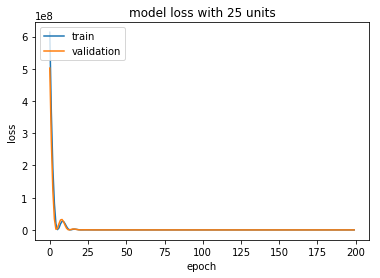

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 625)               7500      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 626       
Total params: 8,126
Trainable params: 8,126
Non-trainable params: 0
_________________________________________________________________


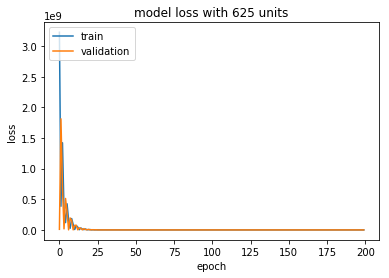

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 15625)             187500    
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 15626     
Total params: 203,126
Trainable params: 203,126
Non-trainable params: 0
_________________________________________________________________


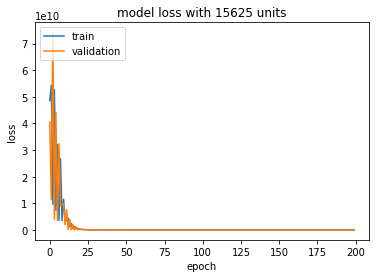

In [34]:

quantity_of_neurons = [25, 625, 15625]
for units in quantity_of_neurons:
    model = Sequential()
    
    # Funcion de Activacion
    model.add(Dense(units, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
    
    # Neurona de Salida
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    ## optimizacion usando gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    
    model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
    history = model.fit(X_train, y_train, epochs=200, batch_size=80, verbose=0, validation_split=0.5)
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss with ' + str(units) + " units")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    

       

# Resultado
Finalmente, se logra minimizar al maximo el margen de error del modelo, ya que como se puede observar en la grafica el modelo de validacion es muy semejante al modelo del entrenamiento